<a href="https://colab.research.google.com/github/shouwiz/Foundations-In-MLP/blob/main/DSE_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
data.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [6]:
test_data.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [10]:
data.dtypes ,
test_data.dtypes

,0
id,int64
Time_spent_Alone,float64
Stage_fear,object
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,object
Friends_circle_size,float64
Post_frequency,float64


In [12]:
data['Stage_fear']

,Stage_fear
0,No
1,No
2,Yes
3,No
4,No
...,...
18519,No
18520,NaN
18521,Yes
18522,Yes


In [13]:
data['Personality']

,Personality
0,Extrovert
1,Extrovert
2,Introvert
3,Extrovert
4,Extrovert
...,...
18519,Extrovert
18520,Extrovert
18521,Introvert
18522,Introvert


In [14]:
data['Personality'].unique()

array(['Extrovert', 'Introvert'], dtype=object)

In [17]:
data.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [18]:
data.shape #rows,columns

(18524, 9)

In [25]:
#### Visualizing

<Axes: >

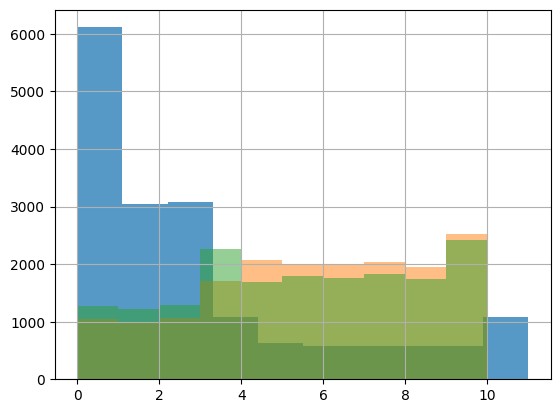

In [35]:
data['Time_spent_Alone'].hist(bins=10, alpha=0.75)
data['Social_event_attendance'].hist(bins=10, alpha=0.5) #from 4 to 10 people don't like to go to social events but go due to peersdata
data['Post_frequency'].hist(bins=10,alpha = 0.5)

<Axes: >

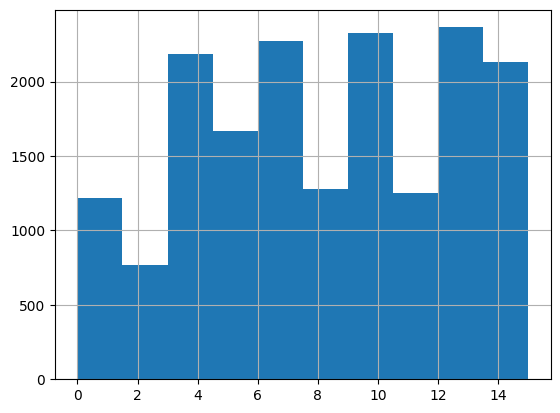

In [29]:
data['Friends_circle_size'].hist(bins=10)

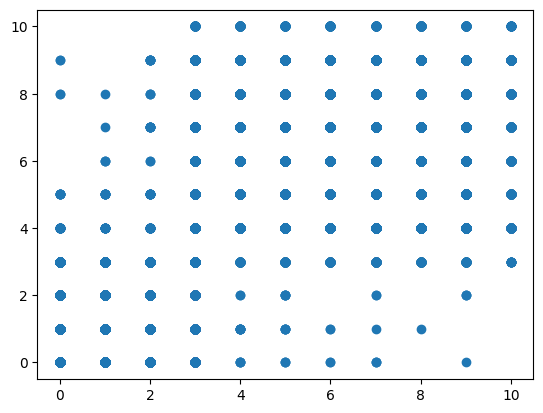

In [37]:
plt.scatter(data['Post_frequency'], data['Social_event_attendance'])

In [38]:
data.drop(columns=["Stage_fear","Drained_after_socializing","Personality","id"]).corr()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.628806,-0.640884,-0.598014,-0.611544
Social_event_attendance,-0.628806,1.000000,0.585224,0.566675,0.566679
Going_outside,-0.640884,0.585224,1.000000,0.549864,0.579305
Friends_circle_size,-0.598014,0.566675,0.549864,1.000000,0.522272
Post_frequency,-0.611544,0.566679,0.579305,0.522272,1.000000


Preprocessing

In [41]:
x = data.drop(columns=["Personality"])
y = data['Personality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=66)

In [42]:
x_train.shape

(3704, 8)

In [43]:
x_train.isna().sum()

,0
id,0
Time_spent_Alone,243
Stage_fear,372
Social_event_attendance,236
Going_outside,305
Drained_after_socializing,227
Friends_circle_size,196
Post_frequency,241
